In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
eda =pd.read_csv("eda.csv", sep=',')

In [2]:
eda

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.000000,1,0,7.2500,S
1,2,1,3,female,26.000000,0,0,7.9250,S
2,3,1,1,female,35.000000,1,0,53.1000,S
3,4,0,3,male,35.000000,0,0,8.0500,S
4,5,0,3,male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
674,886,0,2,male,27.000000,0,0,13.0000,S
675,887,1,1,female,19.000000,0,0,30.0000,S
676,888,0,3,female,29.699118,1,2,23.4500,S
677,889,1,1,male,26.000000,0,0,30.0000,C


In [3]:
eda=eda.drop(["Unnamed: 0"],axis=1)
eda

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,3,female,26.000000,0,0,7.9250,S
2,1,1,female,35.000000,1,0,53.1000,S
3,0,3,male,35.000000,0,0,8.0500,S
4,0,3,male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
674,0,2,male,27.000000,0,0,13.0000,S
675,1,1,female,19.000000,0,0,30.0000,S
676,0,3,female,29.699118,1,2,23.4500,S
677,1,1,male,26.000000,0,0,30.0000,C


# Feature Engineering - Variable and Dummy Variable Creation

In [4]:
obj = eda.dtypes == np.object
print(obj)

Survived    False
Pclass      False
Sex          True
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool


In [5]:
eda.columns[obj]

Index(['Sex', 'Embarked'], dtype='object')

In [6]:
dummydf = pd.DataFrame()
for i in ['Pclass','Sex','Embarked']:
 dummy=pd.get_dummies(eda[i], drop_first=True)
 dummydf=pd.concat([dummydf, dummy], axis=1)
    

In [7]:
print(dummydf)

     2  3  male  Q  S
0    0  1     1  0  1
1    0  1     0  0  1
2    0  0     0  0  1
3    0  1     1  0  1
4    0  1     1  1  0
..  .. ..   ... .. ..
674  1  0     1  0  1
675  0  0     0  0  1
676  0  1     0  0  1
677  0  0     1  0  0
678  0  1     1  1  0

[679 rows x 5 columns]


In [8]:
eda = pd.concat([eda,dummydf ], axis = 1)

In [9]:
eda.drop(['Pclass','Sex','Embarked'], axis=1, inplace=True)
eda = pd.get_dummies(eda, drop_first=True)
eda

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.000000,1,0,7.2500,0,1,1,0,1
1,1,26.000000,0,0,7.9250,0,1,0,0,1
2,1,35.000000,1,0,53.1000,0,0,0,0,1
3,0,35.000000,0,0,8.0500,0,1,1,0,1
4,0,29.699118,0,0,8.4583,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
674,0,27.000000,0,0,13.0000,1,0,1,0,1
675,1,19.000000,0,0,30.0000,0,0,0,0,1
676,0,29.699118,1,2,23.4500,0,1,0,0,1
677,1,26.000000,0,0,30.0000,0,0,1,0,0


# Defining X & Y variables

In [10]:
cols = eda.columns
cols=['Age','SibSp','Parch','Fare',2,3,'male','Q','S','Survived']
eda = eda[cols]
eda

,Age,SibSp,Parch,Fare,2,3,male,Q,S,Survived
0,22.000000,1,0,7.2500,0,1,1,0,1,0
1,26.000000,0,0,7.9250,0,1,0,0,1,1
2,35.000000,1,0,53.1000,0,0,0,0,1,1
3,35.000000,0,0,8.0500,0,1,1,0,1,0
4,29.699118,0,0,8.4583,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
674,27.000000,0,0,13.0000,1,0,1,0,1,0
675,19.000000,0,0,30.0000,0,0,0,0,1,1
676,29.699118,1,2,23.4500,0,1,0,0,1,0
677,26.000000,0,0,30.0000,0,0,1,0,0,1


In [11]:
X = eda.iloc[:,:-1].values
y = eda["Survived"]

In [12]:
X

array([[22.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [26.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [35.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [29.69911765,  1.        ,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       [26.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [32.        ,  0.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ]])

In [13]:
X.shape

(679, 9)

In [14]:
y.shape

(679,)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(475, 9)

In [18]:
X_test.shape

(204, 9)

In [19]:
y_train.shape

(475,)

In [20]:
y_test.shape

(204,)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
y_test

113    1
590    1
420    0
157    0
279    0
      ..
109    1
247    1
310    0
190    0
299    0
Name: Survived, Length: 204, dtype: int64

In [25]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[111  14]
 [ 28  51]]


In [27]:
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [28]:
print(confusion)
print ("TN: ", TN)
print ("FP: ", FP)
print ("FN: ", FN)
print ("TP: ", TP)

[[111  14]
 [ 28  51]]
TN:  111
FP:  14
FN:  28
TP:  51


In [29]:
confusion_matrix = pd.DataFrame(confusion)
confusion_matrix.columns = ['Predicted No Subscription', 'Predicted Yes Subscription']
confusion_matrix = confusion_matrix.rename(index = {0 : 'Actual No Subscription', 1 : 'Actual Yes Subscription'})
confusion_matrix

,Predicted No Subscription,Predicted Yes Subscription
Actual No Subscription,111,14
Actual Yes Subscription,28,51


In [30]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy1 = (TN+TP)/(TN+TP+FN+FP)
print ("Accuracy from metrics: ", accuracy)
print ("Accuracy Calculated: ", accuracy1)

Accuracy from metrics:  0.7941176470588235
Accuracy Calculated:  0.7941176470588235


In [31]:
print ((FP+FN)/float(TP+TN+FP+FN))
print (round(1-metrics.accuracy_score(y_test, y_pred),4))

0.20588235294117646
0.2059


In [32]:
print ("RECALL:", metrics.recall_score(y_test,y_pred))
print("CALCULATED RECALL: ", (TP)/(TP+FN))

RECALL: 0.6455696202531646
CALCULATED RECALL:  0.6455696202531646


In [33]:
print ("SPECIFICITY/TRUE NEGATIVE RATE:", (TN)/(TN+FP))

SPECIFICITY/TRUE NEGATIVE RATE: 0.888


In [34]:
print("FALSE POSITIVE RATE: ",(FN)/(FN+TP))

FALSE POSITIVE RATE:  0.35443037974683544


In [35]:
print("FALSE NEGATIVE RATE: ",(FP)/(TN+FP))

FALSE NEGATIVE RATE:  0.112


In [36]:
print ("Precision: ", round(metrics.precision_score(y_test,y_pred),2))
print ("PRECISION CALCULATED: ", round(TP/float(TP+FP),2))

Precision:  0.78
PRECISION CALCULATED:  0.78


In [37]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy is  :' ,round(accuracy,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,4)*100)
print('Roc Auc is  :',round(roc_auc,2)*100)

Accuracy is  : 79.0
F1 score is : 71.0
Precision is  : 78.0
Recall is  : 64.56
Roc Auc is  : 77.0


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       125
           1       0.78      0.65      0.71        79

    accuracy                           0.79       204
   macro avg       0.79      0.77      0.77       204
weighted avg       0.79      0.79      0.79       204



# Decision Tree Model

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
clf= DecisionTreeClassifier()


In [41]:
clf= clf.fit(X_train,y_train)
clf= clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred


array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0], dtype=int64)

In [42]:
from sklearn import metrics 

In [43]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2),"%")

Accuracy: 79.41 %


In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[109,  16],
       [ 26,  53]], dtype=int64)

# Random Forest

In [46]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [47]:
from sklearn.ensemble import RandomForestClassifier
# Creating a RAndom Forest Classifier
clf = RandomForestClassifier(n_estimators = 40, n_jobs= 2, random_state= 0)
# Training the Classifier
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=40, n_jobs=2, random_state=0)

In [48]:
# Applying the trained data to predict test data
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0], dtype=int64)

In [49]:
y_test

113    1
590    1
420    0
157    0
279    0
      ..
109    1
247    1
310    0
190    0
299    0
Name: Survived, Length: 204, dtype: int64

In [50]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0], dtype=int64)

In [51]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [52]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[112,  13],
       [ 28,  51]], dtype=int64)

In [53]:
pd.crosstab(y_test, y_pred, rownames = ['Actual Status'], colnames = ['Predicted Status'])


Predicted Status,0,1
Actual Status,,
0,112,13
1,28,51


In [54]:
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",score*100,"%")

Accuracy: 79.90196078431373 %


# KNN Means Model

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
y_pred = knn.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test, y_pred)
cm

array([[112,  13],
       [ 29,  50]], dtype=int64)

In [58]:
accuracy_score(y_test, y_pred)

0.7941176470588235

In [59]:
error = []
accuracy = []

# Calculating error for K values between 1 and 40
for k in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error.append(np.mean(pred_k != y_test))
    accuracy.append(accuracy_score(y_test, pred_k))

Text(0, 0.5, 'Mean Error')

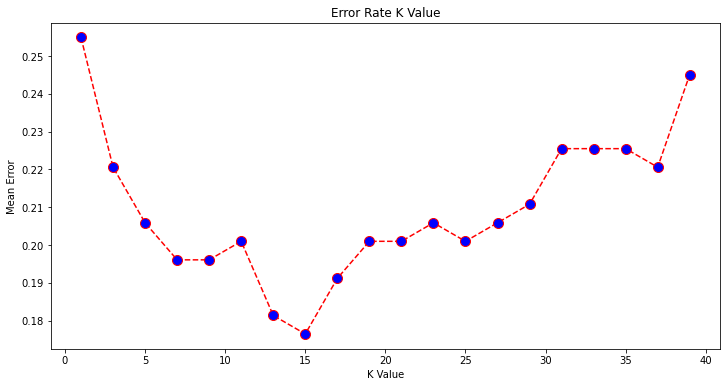

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

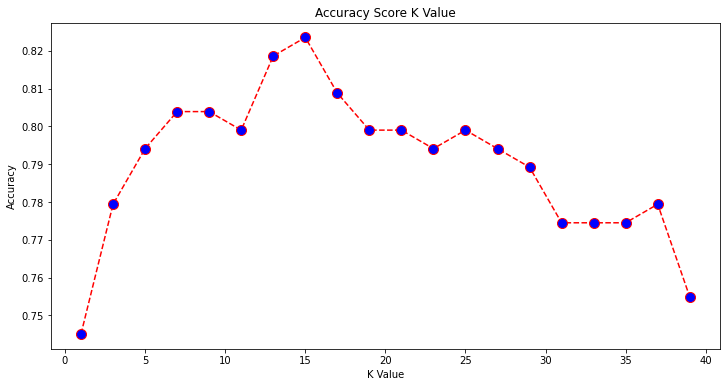

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [63]:
y_pred = knn.predict(X_test)

In [64]:
confusion_matrix(y_test, y_pred)

array([[120,   5],
       [ 31,  48]], dtype=int64)

In [65]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 82.35294117647058 %


# Accuracy for various models 

LogisticRegression = 79%         
Decisiion tree = 79.41 %        
Random forest = 79.9019 %               
KNN = 82.3529%

# Based on the Accuracy of the result:

# KNN model is best suited classification model for titanic dataset